### Exercise 7.1: Nonlinear Oscillator Models

For this example, we will use our generalized ```rk4``` function from Example 7.4. 

Consider the restoring forces arising from both potentials:


$F_k(x) = - kx ( 1 - \alpha x)$,

and:

$F_k(x) =  - k x^{p-1}$. 

Consider values of $p = 6$ and one anhmaronic strength in $ 0 \leq \alpha  \leq 2$. 

(a) Check that the solution remains periodic with constant amplitude for a given initial condition, regardless of how nonlinear you make the force. In particular, check that the maximum speed occurs at $x=0$, and that the velocity $v=0$ at the maximum $x$, the latter being a consequence of energy conservation.  

(b) Verify that nonharmonic oscillators are *nonisosynchronous*, i.e. that vibrations with different amplitudes have different periods. 

Bonus 20%:

(c) Devise an algorithm to determinet he period $T$ of the oscillation, by recording times at which the mass passes through the origin. Note that because the motion may be asymmetric, you must record at least three times to deduce the period. 

(d) Construct a graph of the deduced period as a function of initial amplitude. 



Solution: 

Let's begin by copying over the ```rk4``` code that handles higher-order ODEs. 

In [4]:
import numpy as np

# The function should now take as input an array of f_i
# and an array of initial conditions y0 
# we also change the names of the independent variables to time, t
# REMEMBER: there is still only one independent variable! 
def rk4(f, y0, t0, t1, h): 
    """Integrates first-order coupled differential equation using fourt-order Runge-Kutta"""
    # check that the length of f is the same as the length of the initial conditions: 
    if len(f(t0,y0)) != len(y0):
        raise Exception("The number of initial conditions has to be equal to the number of first-order DEs")
    # number of steps N:
    N = int((t1 - t0)/h) # convert to integer
    # the return arrays:
    ys = np.zeros((N,len(y0))) # the output dependent variables have to have the same length as the number of equations
    ts = np.zeros(N) # this is still a 1D list
    # set the initial values:
    ys[0] = y0
    ts[0] = t0
    # start at the initial value of time:
    tn = t0
    # increment the time: 
    for n in range(1,N):
        ynvec = ys[n-1] # this will hold the current values of the dependent variables 
        k1 = h * f(tn,ynvec)
        k2 = h * f(tn+0.5*h, ynvec+0.5*k1)
        k3 = h * f(tn+0.5*h, ynvec+0.5*k2)
        k4 = h * f(tn+h, ynvec+k3)
        ynext = ynvec + (1/6)*(k1+2*k2+2*k3+k4)
        ys[n] = ynext
        # increment the time 
        tn = tn + h
        ts[n] = tn
    # return the arrays
    return ts, ys

Let's now also define the RHS (force) functions for each of the two models that we wish to investigate:

In [5]:
# the RHS function vectors for the two models:
# should take as input t and y, 
# where the latter is a list of the independent variables

# fix the constant k in all cases to be the one corresponding to 
# T = 1 for SHO:
k = 4 * np.pi**2

# fix the parameters: 
p = 6 
def fnonlinearp(t,y):
    f1 = y[1] 
    f2 = - k* y[0]**(p-1)
    return np.array([f1, f2])

alpha = 0.5
def fnonlineara(t,y):
    f1 = y[1] 
    f2 = - k* y[0]*(1-alpha*y[0])
    return np.array([f1, f2])

Let's now use the 4-th order Runge-Kutta to investigate the chosen values!

In [13]:
# the initial and final points: 
t0 = 0
t1 = 5 # this is expected to correspond to 10 periods for SHO

# the initial conditions: 
y0=[1,0] # i.e. [x,p] at t=0

# the step size:
h = 1E-3

# call solver for each model:
tsp, ysp = rk4(fnonlinearp, y0, t0, t1, h)
tsa, ysa = rk4(fnonlineara, y0, t0, t1, h)

(a) To check that the maximum speed occurs at $x=0$, we plot both the velocity $v$ and $x$ as functions of time. (Since we set the mass $m=1$, we simply have momentum $=v$)

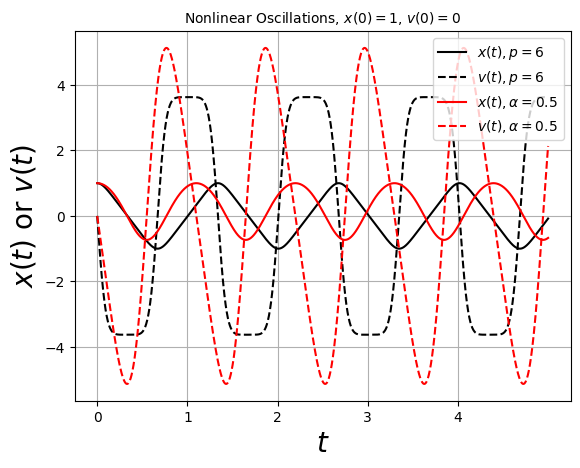

In [16]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np
from math import pi

x = np.linspace(0, 2 * np.pi, 200) # creates a NumPy array from 0 to 2pi, 200 equallys-paced points  
y = np.sin(x) # take the NumPy array and create another one, where each term is now the sine of each of the elements of the above NumPy array

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$t$', fontsize=20) # set the x label
ax.set_ylabel(r'$x(t)$ or $v(t)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Nonlinear Oscillations, $x(0)=1$, $v(0)=0$', fontsize=10) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(tsp, ysp.T[0], label='$x(t), p=6$', color='black') 
ax.plot(tsp, ysp.T[1], label='$v(t), p=6$', color='black', ls='--') 
ax.plot(tsa, ysa.T[0], label=r'$x(t), \alpha=0.5$', color='red') 
ax.plot(tsa, ysa.T[1], label=r'$v(t), \alpha=0.5$', ls='--', color='red') 

# set the ticks
ax.set_xticks(range(5))
ax.grid()

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

(b) Let's now check that the periods change with amplitude, e.g. for the anharmonic strenght model with $\alpha=0.5$:

In [36]:
# the initial and final points: 
t0 = 0
t1 = 3 # this is expected to correspond to 10 periods for SHO


y0 = [1, 0]
tsa, ysa1 = rk4(fnonlineara, y0, t0, t1, h)
y0 = [1.5, 0]
tsa, ysa15 = rk4(fnonlineara, y0, t0, t1, h)
y0 = [1.75, 0]
tsa, ysa175 = rk4(fnonlineara, y0, t0, t1, h)

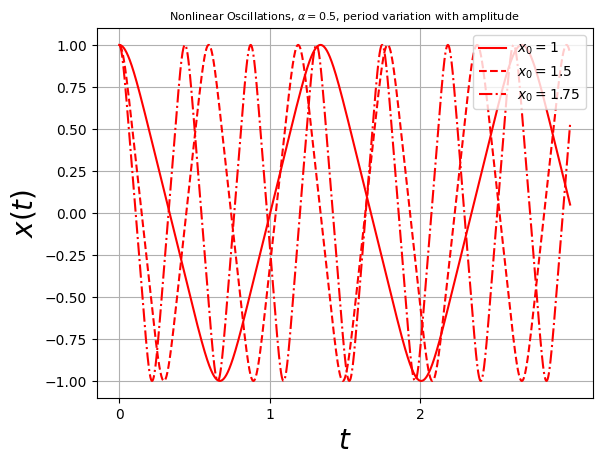

In [83]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np
from math import pi

x = np.linspace(0, 2 * np.pi, 200) # creates a NumPy array from 0 to 2pi, 200 equallys-paced points  
y = np.sin(x) # take the NumPy array and create another one, where each term is now the sine of each of the elements of the above NumPy array

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$t$', fontsize=20) # set the x label
ax.set_ylabel(r'$x(t)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title(r'Nonlinear Oscillations, $\alpha=0.5$, period variation with amplitude', fontsize=8) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(tsa, ysa1.T[0], label=r'$x_0=1$', color='red', ls='-') 
ax.plot(tsa, ysa15.T[0]/1.5, label=r'$x_0=1.5$', color='red',ls='--') 
ax.plot(tsa, ysa175.T[0]/1.75, label=r'$x_0=1.75$', color='red', ls='-.') 


# set the ticks
ax.set_xticks(range(3))
ax.grid()

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

In [46]:
# the initial and final points: 
t0 = 0
t1 = 3 # this is expected to correspond to 10 periods for SHO


y0 = [1, 0]
tsp, ysp1 = rk4(fnonlinearp, y0, t0, t1, h)
y0 = [1.5, 0]
tsp, ysp15 = rk4(fnonlinearp, y0, t0, t1, h)
y0 = [1.75, 0]
tsp, ysp175 = rk4(fnonlinearp, y0, t0, t1, h)

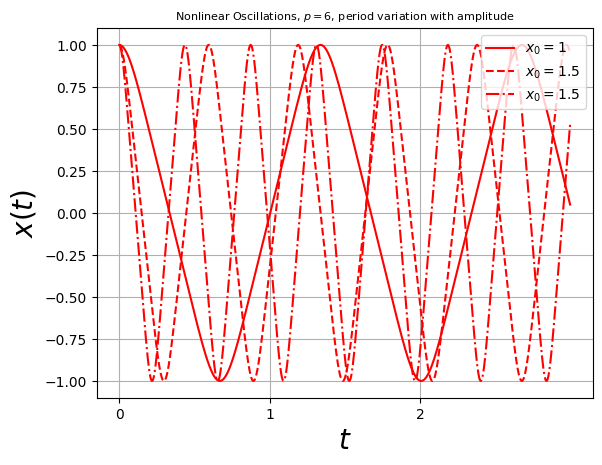

In [47]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np
from math import pi

x = np.linspace(0, 2 * np.pi, 200) # creates a NumPy array from 0 to 2pi, 200 equallys-paced points  
y = np.sin(x) # take the NumPy array and create another one, where each term is now the sine of each of the elements of the above NumPy array

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$t$', fontsize=20) # set the x label
ax.set_ylabel(r'$x(t)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title(r'Nonlinear Oscillations, $p=6$, period variation with amplitude', fontsize=8) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(tsp, ysp1.T[0], label=r'$x_0=1$', color='red', ls='-') 
ax.plot(tsp, ysp15.T[0]/1.5, label=r'$x_0=1.5$', color='red',ls='--') 
ax.plot(tsp, ysp175.T[0]/1.75, label=r'$x_0=1.5$', color='red', ls='-.') 
# set the ticks
ax.set_xticks(range(3))
ax.grid()

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

Clearly the period depends on the amplitude! 

(c) Let's now write a function that calculates the period given the results of the Runge-Kutta method

In [93]:

# the function will take as input t and x(t):
def periodNL(t,x):
    """Get the period of the nonlinear oscillator"""
    # find the points where x changes sign and put the mid-point time in a list:
    tsignch = []
    for i in range(len(x)-1):
        if x[i]*x[i+1] < 0:
            tsignch.append(0.5*(t[i]+t[i+1]))
    # calculate the period:
    T = 2*(tsignch[-1] - tsignch[0])/(len(tsignch)-1)
    return T

y0min = 1
y0max = 1.8
Npoints = 80
Tarrayp = [] 
Tarraya = []
x0array = []
for i in range(Npoints):
    y0 = [y0min + i*(y0max-y0min)/Npoints, 0]
    tsp, ysp = rk4(fnonlinearp, y0, t0, t1, h)
    tsa, ysa = rk4(fnonlineara, y0, t0, t1, h)
    Tarrayp.append(periodNL(tsp,ysp.T[0]))
    Tarraya.append(periodNL(tsa,ysa.T[0])) 
    x0array.append(y0min + i*(y0max-y0min)/Npoints)

(d) Let's plot the variation of the period with amplitude!

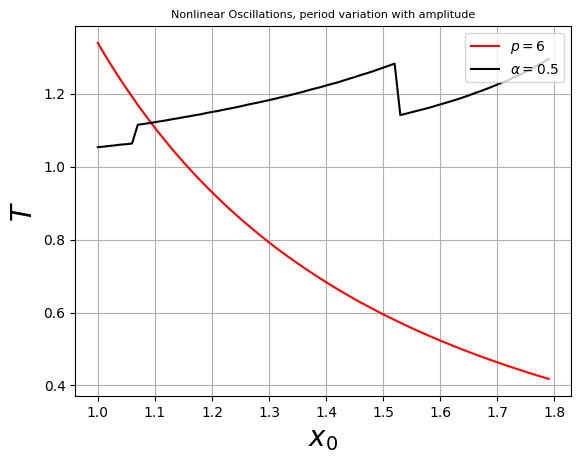

In [94]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np
from math import pi

x = np.linspace(0, 2 * np.pi, 200) # creates a NumPy array from 0 to 2pi, 200 equallys-paced points  
y = np.sin(x) # take the NumPy array and create another one, where each term is now the sine of each of the elements of the above NumPy array

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x_0$', fontsize=20) # set the x label
ax.set_ylabel(r'$T$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title(r'Nonlinear Oscillations, period variation with amplitude', fontsize=8) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(x0array, Tarrayp, label=r'$p=6$', color='red', ls='-') 
ax.plot(x0array, Tarraya, label=r'$\alpha=0.5$', color='black', ls='-') 

# set the ticks
#ax.set_xticks(range(3))
ax.grid()

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here